In [59]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

# Seasonal-Trend Decomposition using LOESS (STL)

## Read the Data

In [60]:
catfish_sales = pd.read_csv('catfish.csv')
print(catfish_sales)

           Date  Total
0     1986-1-01   9034
1     1986-2-01   9596
2     1986-3-01  10558
3     1986-4-01   9002
4     1986-5-01   9239
..          ...    ...
319   2012-8-01  14442
320   2012-9-01  13422
321  2012-10-01  13795
322  2012-11-01  13352
323  2012-12-01  12716

[324 rows x 2 columns]


In [61]:
# Convert to datetime
catfish_sales.Date = pd.to_datetime(catfish_sales.Date)

print(catfish_sales)

          Date  Total
0   1986-01-01   9034
1   1986-02-01   9596
2   1986-03-01  10558
3   1986-04-01   9002
4   1986-05-01   9239
..         ...    ...
319 2012-08-01  14442
320 2012-09-01  13422
321 2012-10-01  13795
322 2012-11-01  13352
323 2012-12-01  12716

[324 rows x 2 columns]


In [62]:
# Set Index
catfish_sales = catfish_sales.set_index('Date')
print(catfish_sales)

            Total
Date             
1986-01-01   9034
1986-02-01   9596
1986-03-01  10558
1986-04-01   9002
1986-05-01   9239
...           ...
2012-08-01  14442
2012-09-01  13422
2012-10-01  13795
2012-11-01  13352
2012-12-01  12716

[324 rows x 1 columns]


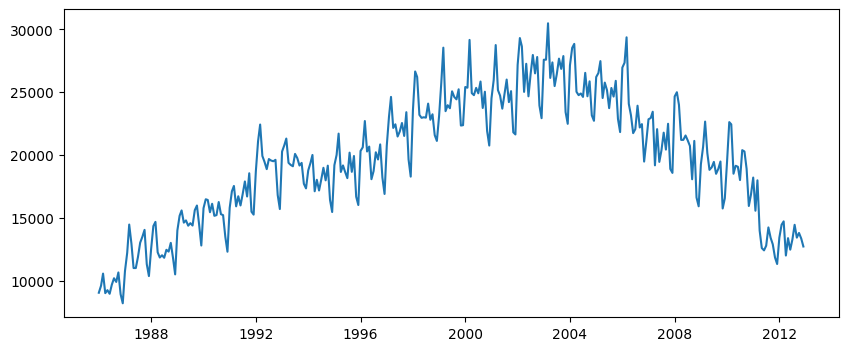

In [63]:
plt.figure(figsize=(10,4))
plt.plot(catfish_sales)
# plt.show()

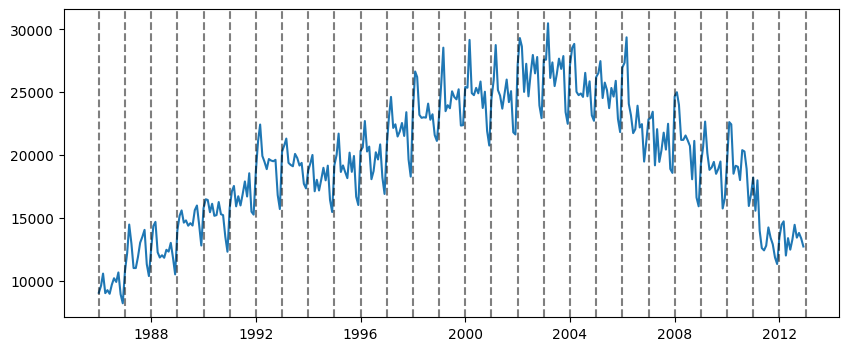

In [64]:
plt.figure(figsize=(10,4))
plt.plot(catfish_sales)
for year in range(1986,2014):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

## Visual Inspection: Mid-2011 and Late-2016

## Perform STL Decomp

In [65]:
stl = STL(catfish_sales)
result = stl.fit()


In [66]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

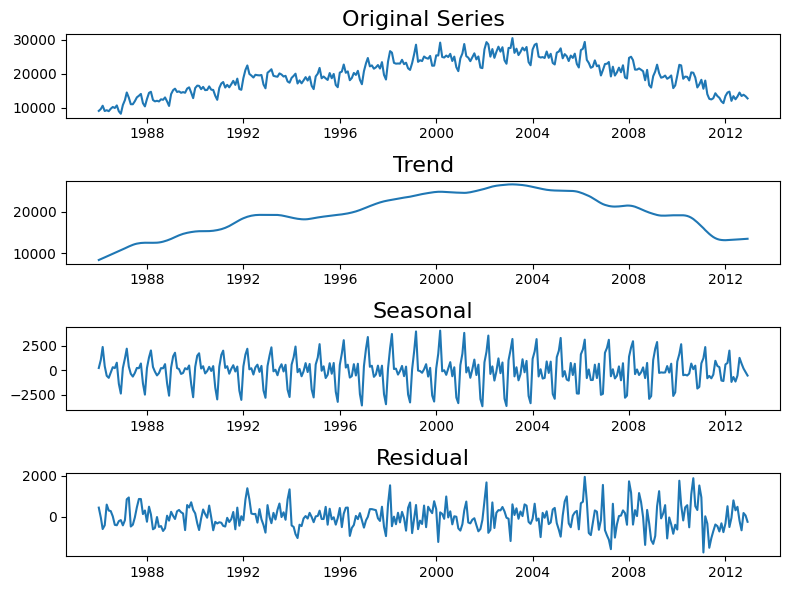

In [67]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(catfish_sales)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

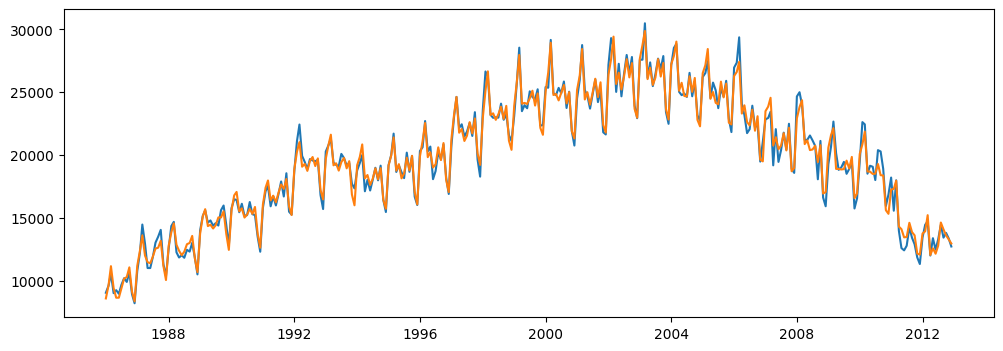

In [68]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(catfish_sales)
plt.plot(estimated)

## Anomaly Detection

In [69]:
resid_mu = resid.mean()
resid_dev = resid.std()

print("Resid mu :" , resid_mu)
print("Resid dev :" , resid_dev)

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

print("Lower : " , lower)
print("Upper : " , upper)

Resid mu : 4.763254002617301
Resid dev : 593.8529055623394
Lower :  -1776.795462684401
Upper :  1786.3219706896355


(5843.0, 15706.0)

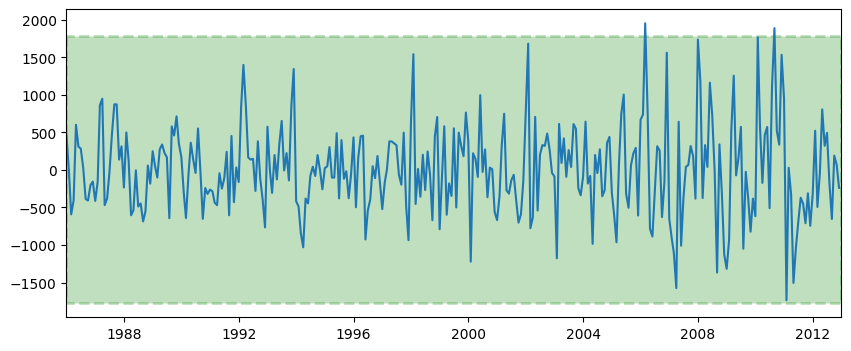

In [70]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(1985,12,31), datetime(2013,1,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(1985,12,31), datetime(2013,1,1))

In [71]:
anomalies = catfish_sales[(resid < lower) | (resid > upper)]
print(anomalies)

            Total
Date             
2006-03-01  29367
2010-09-01  20280


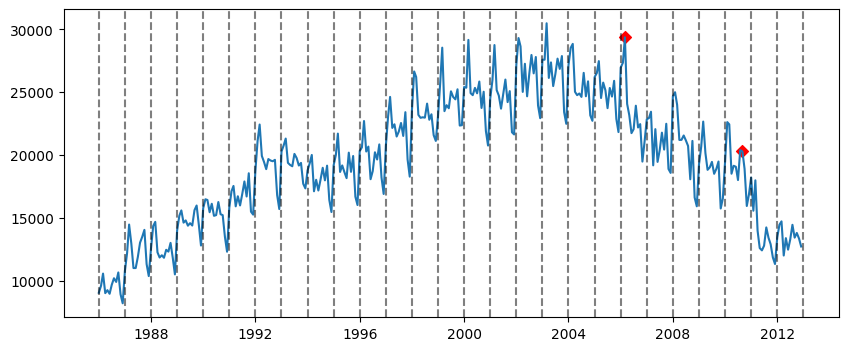

In [76]:


plt.figure(figsize=(10,4))
plt.plot(catfish_sales)
for year in range(1986,2014):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)  # type: ignore
    
plt.scatter(anomalies.index, anomalies.Total, color='r', marker='D')

In [ ]:
anomalies

,Total
Date,
2006-03-01,29367
2010-09-01,20280
